In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import skimage

/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


In [2]:
train= datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
len(trainset)

6000

In [6]:
x,y = data[0][0],data[1][0]
print(y)

tensor(3)


<function matplotlib.pyplot.show(close=None, block=None)>

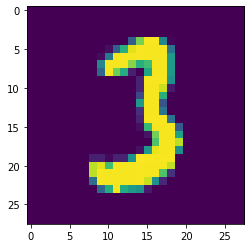

In [7]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show

In [8]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [ ]:
#data balancing
total = 0
counter_dict = {0:0, 1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1
print(counter_dict)

In [ ]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

In [7]:
train= datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) ##784 = 28*28, the flatten image
        self.fc2 = nn.Linear(64, 64) #64 is the hidden layers, so from fc1 we take in 64, and then output 64
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #we have 10 classes, so 10 output
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #we don't want to run relu here because we are not doing anything with the 10 output
        
        return F.log_softmax(x,dim=1) #dimension = 1 because the layer is
    
        
net = Net()
print(net)


      

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [18]:
X = torch.rand((28,28))
X = X.view(1,28*28)

In [19]:
output = net(X)
output

tensor([[-2.1908, -2.3287, -2.2476, -2.4236, -2.4541, -2.2751, -2.2468, -2.3871,
         -2.2966, -2.2117]], grad_fn=<LogSoftmaxBackward0>)

In [22]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001) #we optimize for loss, and accurary follows

EPOCHS = 3 #Epoch known as a full pass through, we are making 3 whole passes here.

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X,y = data
        #print(X[0])
        #print(y[0])
        #we get rows of pixels when printing
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y) 
        loss.backward() #backpropergate
        optimizer.step()
        print(loss)


tensor(2.2620, grad_fn=<NllLossBackward0>)
tensor(2.2644, grad_fn=<NllLossBackward0>)
tensor(2.3249, grad_fn=<NllLossBackward0>)
tensor(2.3076, grad_fn=<NllLossBackward0>)
tensor(2.3439, grad_fn=<NllLossBackward0>)
tensor(2.3102, grad_fn=<NllLossBackward0>)
tensor(2.3174, grad_fn=<NllLossBackward0>)
tensor(2.3029, grad_fn=<NllLossBackward0>)
tensor(2.2391, grad_fn=<NllLossBackward0>)
tensor(2.3186, grad_fn=<NllLossBackward0>)
tensor(2.2894, grad_fn=<NllLossBackward0>)
tensor(2.2932, grad_fn=<NllLossBackward0>)
tensor(2.2610, grad_fn=<NllLossBackward0>)
tensor(2.2564, grad_fn=<NllLossBackward0>)
tensor(2.2701, grad_fn=<NllLossBackward0>)
tensor(2.2909, grad_fn=<NllLossBackward0>)
tensor(2.3184, grad_fn=<NllLossBackward0>)
tensor(2.3238, grad_fn=<NllLossBackward0>)
tensor(2.2726, grad_fn=<NllLossBackward0>)
tensor(2.2632, grad_fn=<NllLossBackward0>)
tensor(2.2206, grad_fn=<NllLossBackward0>)
tensor(2.2253, grad_fn=<NllLossBackward0>)
tensor(2.1526, grad_fn=<NllLossBackward0>)
tensor(2.24

tensor(0.2932, grad_fn=<NllLossBackward0>)
tensor(0.5046, grad_fn=<NllLossBackward0>)
tensor(0.5702, grad_fn=<NllLossBackward0>)
tensor(0.3775, grad_fn=<NllLossBackward0>)
tensor(0.8956, grad_fn=<NllLossBackward0>)
tensor(0.9290, grad_fn=<NllLossBackward0>)
tensor(1.2387, grad_fn=<NllLossBackward0>)
tensor(0.5063, grad_fn=<NllLossBackward0>)
tensor(0.4233, grad_fn=<NllLossBackward0>)
tensor(0.1999, grad_fn=<NllLossBackward0>)
tensor(0.6240, grad_fn=<NllLossBackward0>)
tensor(0.8506, grad_fn=<NllLossBackward0>)
tensor(0.5862, grad_fn=<NllLossBackward0>)
tensor(0.3498, grad_fn=<NllLossBackward0>)
tensor(0.3422, grad_fn=<NllLossBackward0>)
tensor(0.7418, grad_fn=<NllLossBackward0>)
tensor(0.2349, grad_fn=<NllLossBackward0>)
tensor(0.3771, grad_fn=<NllLossBackward0>)
tensor(0.4904, grad_fn=<NllLossBackward0>)
tensor(0.7858, grad_fn=<NllLossBackward0>)
tensor(0.3024, grad_fn=<NllLossBackward0>)
tensor(1.2135, grad_fn=<NllLossBackward0>)
tensor(1.3763, grad_fn=<NllLossBackward0>)
tensor(0.31

tensor(0.9745, grad_fn=<NllLossBackward0>)
tensor(0.1960, grad_fn=<NllLossBackward0>)
tensor(0.4197, grad_fn=<NllLossBackward0>)
tensor(0.2261, grad_fn=<NllLossBackward0>)
tensor(0.4476, grad_fn=<NllLossBackward0>)
tensor(0.3157, grad_fn=<NllLossBackward0>)
tensor(0.3118, grad_fn=<NllLossBackward0>)
tensor(0.1632, grad_fn=<NllLossBackward0>)
tensor(0.2170, grad_fn=<NllLossBackward0>)
tensor(0.9611, grad_fn=<NllLossBackward0>)
tensor(0.0680, grad_fn=<NllLossBackward0>)
tensor(0.3388, grad_fn=<NllLossBackward0>)
tensor(1.2410, grad_fn=<NllLossBackward0>)
tensor(0.3237, grad_fn=<NllLossBackward0>)
tensor(0.3159, grad_fn=<NllLossBackward0>)
tensor(0.8750, grad_fn=<NllLossBackward0>)
tensor(0.4659, grad_fn=<NllLossBackward0>)
tensor(0.2622, grad_fn=<NllLossBackward0>)
tensor(0.3891, grad_fn=<NllLossBackward0>)
tensor(0.0550, grad_fn=<NllLossBackward0>)
tensor(0.5266, grad_fn=<NllLossBackward0>)
tensor(0.1121, grad_fn=<NllLossBackward0>)
tensor(0.1943, grad_fn=<NllLossBackward0>)
tensor(0.41

tensor(0.7985, grad_fn=<NllLossBackward0>)
tensor(0.1930, grad_fn=<NllLossBackward0>)
tensor(0.1712, grad_fn=<NllLossBackward0>)
tensor(0.4545, grad_fn=<NllLossBackward0>)
tensor(0.3966, grad_fn=<NllLossBackward0>)
tensor(0.1686, grad_fn=<NllLossBackward0>)
tensor(0.0790, grad_fn=<NllLossBackward0>)
tensor(0.5742, grad_fn=<NllLossBackward0>)
tensor(0.8871, grad_fn=<NllLossBackward0>)
tensor(0.2317, grad_fn=<NllLossBackward0>)
tensor(0.2324, grad_fn=<NllLossBackward0>)
tensor(0.7929, grad_fn=<NllLossBackward0>)
tensor(0.3395, grad_fn=<NllLossBackward0>)
tensor(0.1305, grad_fn=<NllLossBackward0>)
tensor(0.7058, grad_fn=<NllLossBackward0>)
tensor(0.5814, grad_fn=<NllLossBackward0>)
tensor(0.2813, grad_fn=<NllLossBackward0>)
tensor(0.0756, grad_fn=<NllLossBackward0>)
tensor(0.1847, grad_fn=<NllLossBackward0>)
tensor(0.3630, grad_fn=<NllLossBackward0>)
tensor(0.5278, grad_fn=<NllLossBackward0>)
tensor(0.4191, grad_fn=<NllLossBackward0>)
tensor(1.1001, grad_fn=<NllLossBackward0>)
tensor(0.18

tensor(0.1757, grad_fn=<NllLossBackward0>)
tensor(0.0569, grad_fn=<NllLossBackward0>)
tensor(0.8431, grad_fn=<NllLossBackward0>)
tensor(0.2958, grad_fn=<NllLossBackward0>)
tensor(0.2556, grad_fn=<NllLossBackward0>)
tensor(0.1826, grad_fn=<NllLossBackward0>)
tensor(0.1384, grad_fn=<NllLossBackward0>)
tensor(0.0729, grad_fn=<NllLossBackward0>)
tensor(1.1073, grad_fn=<NllLossBackward0>)
tensor(0.0778, grad_fn=<NllLossBackward0>)
tensor(0.5063, grad_fn=<NllLossBackward0>)
tensor(0.3536, grad_fn=<NllLossBackward0>)
tensor(0.1729, grad_fn=<NllLossBackward0>)
tensor(0.3341, grad_fn=<NllLossBackward0>)
tensor(0.3382, grad_fn=<NllLossBackward0>)
tensor(0.1858, grad_fn=<NllLossBackward0>)
tensor(0.1284, grad_fn=<NllLossBackward0>)
tensor(0.1890, grad_fn=<NllLossBackward0>)
tensor(0.2773, grad_fn=<NllLossBackward0>)
tensor(0.0301, grad_fn=<NllLossBackward0>)
tensor(0.3457, grad_fn=<NllLossBackward0>)
tensor(0.5802, grad_fn=<NllLossBackward0>)
tensor(0.3319, grad_fn=<NllLossBackward0>)
tensor(0.16

tensor(0.1856, grad_fn=<NllLossBackward0>)
tensor(0.4581, grad_fn=<NllLossBackward0>)
tensor(0.3497, grad_fn=<NllLossBackward0>)
tensor(0.0947, grad_fn=<NllLossBackward0>)
tensor(0.1647, grad_fn=<NllLossBackward0>)
tensor(0.4876, grad_fn=<NllLossBackward0>)
tensor(0.3518, grad_fn=<NllLossBackward0>)
tensor(0.2460, grad_fn=<NllLossBackward0>)
tensor(0.1440, grad_fn=<NllLossBackward0>)
tensor(0.2568, grad_fn=<NllLossBackward0>)
tensor(0.1791, grad_fn=<NllLossBackward0>)
tensor(0.3038, grad_fn=<NllLossBackward0>)
tensor(0.1384, grad_fn=<NllLossBackward0>)
tensor(0.5037, grad_fn=<NllLossBackward0>)
tensor(0.2780, grad_fn=<NllLossBackward0>)
tensor(0.7288, grad_fn=<NllLossBackward0>)
tensor(0.0515, grad_fn=<NllLossBackward0>)
tensor(0.0574, grad_fn=<NllLossBackward0>)
tensor(0.0797, grad_fn=<NllLossBackward0>)
tensor(0.0840, grad_fn=<NllLossBackward0>)
tensor(0.1923, grad_fn=<NllLossBackward0>)
tensor(0.0861, grad_fn=<NllLossBackward0>)
tensor(0.2338, grad_fn=<NllLossBackward0>)
tensor(0.54

tensor(0.1176, grad_fn=<NllLossBackward0>)
tensor(0.0570, grad_fn=<NllLossBackward0>)
tensor(0.1241, grad_fn=<NllLossBackward0>)
tensor(0.6059, grad_fn=<NllLossBackward0>)
tensor(0.0741, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.0461, grad_fn=<NllLossBackward0>)
tensor(0.0925, grad_fn=<NllLossBackward0>)
tensor(0.0565, grad_fn=<NllLossBackward0>)
tensor(0.5877, grad_fn=<NllLossBackward0>)
tensor(0.2405, grad_fn=<NllLossBackward0>)
tensor(0.3848, grad_fn=<NllLossBackward0>)
tensor(0.1030, grad_fn=<NllLossBackward0>)
tensor(0.5588, grad_fn=<NllLossBackward0>)
tensor(0.2842, grad_fn=<NllLossBackward0>)
tensor(0.5521, grad_fn=<NllLossBackward0>)
tensor(0.4389, grad_fn=<NllLossBackward0>)
tensor(1.0398, grad_fn=<NllLossBackward0>)
tensor(0.2696, grad_fn=<NllLossBackward0>)
tensor(0.2012, grad_fn=<NllLossBackward0>)
tensor(0.0186, grad_fn=<NllLossBackward0>)
tensor(0.7194, grad_fn=<NllLossBackward0>)
tensor(0.1532, grad_fn=<NllLossBackward0>)
tensor(0.19

tensor(0.1629, grad_fn=<NllLossBackward0>)
tensor(0.1676, grad_fn=<NllLossBackward0>)
tensor(0.1316, grad_fn=<NllLossBackward0>)
tensor(0.9873, grad_fn=<NllLossBackward0>)
tensor(0.0990, grad_fn=<NllLossBackward0>)
tensor(0.3923, grad_fn=<NllLossBackward0>)
tensor(0.0817, grad_fn=<NllLossBackward0>)
tensor(0.0265, grad_fn=<NllLossBackward0>)
tensor(0.4777, grad_fn=<NllLossBackward0>)
tensor(0.0603, grad_fn=<NllLossBackward0>)
tensor(0.1825, grad_fn=<NllLossBackward0>)
tensor(0.7477, grad_fn=<NllLossBackward0>)
tensor(0.5526, grad_fn=<NllLossBackward0>)
tensor(0.0960, grad_fn=<NllLossBackward0>)
tensor(0.0300, grad_fn=<NllLossBackward0>)
tensor(0.6079, grad_fn=<NllLossBackward0>)
tensor(0.3846, grad_fn=<NllLossBackward0>)
tensor(0.3067, grad_fn=<NllLossBackward0>)
tensor(0.6986, grad_fn=<NllLossBackward0>)
tensor(0.0603, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.1531, grad_fn=<NllLossBackward0>)
tensor(0.1353, grad_fn=<NllLossBackward0>)
tensor(0.58

tensor(0.0750, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.1107, grad_fn=<NllLossBackward0>)
tensor(0.5784, grad_fn=<NllLossBackward0>)
tensor(0.0181, grad_fn=<NllLossBackward0>)
tensor(0.2035, grad_fn=<NllLossBackward0>)
tensor(0.0524, grad_fn=<NllLossBackward0>)
tensor(0.2155, grad_fn=<NllLossBackward0>)
tensor(0.6819, grad_fn=<NllLossBackward0>)
tensor(0.2837, grad_fn=<NllLossBackward0>)
tensor(0.0217, grad_fn=<NllLossBackward0>)
tensor(0.2979, grad_fn=<NllLossBackward0>)
tensor(0.4388, grad_fn=<NllLossBackward0>)
tensor(0.0375, grad_fn=<NllLossBackward0>)
tensor(0.2218, grad_fn=<NllLossBackward0>)
tensor(0.1612, grad_fn=<NllLossBackward0>)
tensor(0.3519, grad_fn=<NllLossBackward0>)
tensor(1.0423, grad_fn=<NllLossBackward0>)
tensor(0.1418, grad_fn=<NllLossBackward0>)
tensor(0.8047, grad_fn=<NllLossBackward0>)
tensor(0.1074, grad_fn=<NllLossBackward0>)
tensor(0.0456, grad_fn=<NllLossBackward0>)
tensor(0.5584, grad_fn=<NllLossBackward0>)
tensor(0.53

tensor(0.2058, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.4101, grad_fn=<NllLossBackward0>)
tensor(1.0151, grad_fn=<NllLossBackward0>)
tensor(0.5104, grad_fn=<NllLossBackward0>)
tensor(0.4663, grad_fn=<NllLossBackward0>)
tensor(0.0429, grad_fn=<NllLossBackward0>)
tensor(0.5971, grad_fn=<NllLossBackward0>)
tensor(0.0866, grad_fn=<NllLossBackward0>)
tensor(0.0340, grad_fn=<NllLossBackward0>)
tensor(0.0210, grad_fn=<NllLossBackward0>)
tensor(0.0234, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.4198, grad_fn=<NllLossBackward0>)
tensor(0.7639, grad_fn=<NllLossBackward0>)
tensor(0.6110, grad_fn=<NllLossBackward0>)
tensor(0.2082, grad_fn=<NllLossBackward0>)
tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.0459, grad_fn=<NllLossBackward0>)
tensor(0.6958, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.0574, grad_fn=<NllLossBackward0>)
tensor(0.0337, grad_fn=<NllLossBackward0>)
tensor(0.25

tensor(0.9940, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.2083, grad_fn=<NllLossBackward0>)
tensor(0.4955, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.1809, grad_fn=<NllLossBackward0>)
tensor(0.2462, grad_fn=<NllLossBackward0>)
tensor(0.1066, grad_fn=<NllLossBackward0>)
tensor(0.0763, grad_fn=<NllLossBackward0>)
tensor(0.2799, grad_fn=<NllLossBackward0>)
tensor(0.9789, grad_fn=<NllLossBackward0>)
tensor(0.3724, grad_fn=<NllLossBackward0>)
tensor(0.0969, grad_fn=<NllLossBackward0>)
tensor(0.2673, grad_fn=<NllLossBackward0>)
tensor(0.0989, grad_fn=<NllLossBackward0>)
tensor(0.4179, grad_fn=<NllLossBackward0>)
tensor(0.3899, grad_fn=<NllLossBackward0>)
tensor(0.2570, grad_fn=<NllLossBackward0>)
tensor(0.0978, grad_fn=<NllLossBackward0>)
tensor(0.2892, grad_fn=<NllLossBackward0>)
tensor(0.0865, grad_fn=<NllLossBackward0>)
tensor(0.3680, grad_fn=<NllLossBackward0>)
tensor(0.4924, grad_fn=<NllLossBackward0>)
tensor(0.44

tensor(0.3257, grad_fn=<NllLossBackward0>)
tensor(0.4534, grad_fn=<NllLossBackward0>)
tensor(0.0296, grad_fn=<NllLossBackward0>)
tensor(0.5408, grad_fn=<NllLossBackward0>)
tensor(0.5917, grad_fn=<NllLossBackward0>)
tensor(0.9981, grad_fn=<NllLossBackward0>)
tensor(0.2622, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.4649, grad_fn=<NllLossBackward0>)
tensor(0.1612, grad_fn=<NllLossBackward0>)
tensor(0.1380, grad_fn=<NllLossBackward0>)
tensor(0.2593, grad_fn=<NllLossBackward0>)
tensor(0.1095, grad_fn=<NllLossBackward0>)
tensor(0.2614, grad_fn=<NllLossBackward0>)
tensor(0.4211, grad_fn=<NllLossBackward0>)
tensor(0.3628, grad_fn=<NllLossBackward0>)
tensor(0.2548, grad_fn=<NllLossBackward0>)
tensor(0.0388, grad_fn=<NllLossBackward0>)
tensor(0.3752, grad_fn=<NllLossBackward0>)
tensor(0.1923, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.2524, grad_fn=<NllLossBackward0>)
tensor(0.0251, grad_fn=<NllLossBackward0>)
tensor(0.49

tensor(0.6796, grad_fn=<NllLossBackward0>)
tensor(0.5845, grad_fn=<NllLossBackward0>)
tensor(0.4933, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0655, grad_fn=<NllLossBackward0>)
tensor(0.1671, grad_fn=<NllLossBackward0>)
tensor(0.1704, grad_fn=<NllLossBackward0>)
tensor(0.1156, grad_fn=<NllLossBackward0>)
tensor(0.0296, grad_fn=<NllLossBackward0>)
tensor(0.3370, grad_fn=<NllLossBackward0>)
tensor(0.6173, grad_fn=<NllLossBackward0>)
tensor(0.5079, grad_fn=<NllLossBackward0>)
tensor(0.3621, grad_fn=<NllLossBackward0>)
tensor(0.3704, grad_fn=<NllLossBackward0>)
tensor(0.8892, grad_fn=<NllLossBackward0>)
tensor(0.2823, grad_fn=<NllLossBackward0>)
tensor(0.1295, grad_fn=<NllLossBackward0>)
tensor(0.0610, grad_fn=<NllLossBackward0>)
tensor(0.0557, grad_fn=<NllLossBackward0>)
tensor(0.2345, grad_fn=<NllLossBackward0>)
tensor(0.0542, grad_fn=<NllLossBackward0>)
tensor(0.3708, grad_fn=<NllLossBackward0>)
tensor(0.5885, grad_fn=<NllLossBackward0>)
tensor(0.14

tensor(0.9509, grad_fn=<NllLossBackward0>)
tensor(0.1035, grad_fn=<NllLossBackward0>)
tensor(0.0626, grad_fn=<NllLossBackward0>)
tensor(0.2622, grad_fn=<NllLossBackward0>)
tensor(0.0480, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.9603, grad_fn=<NllLossBackward0>)
tensor(0.1147, grad_fn=<NllLossBackward0>)
tensor(0.1350, grad_fn=<NllLossBackward0>)
tensor(1.0770, grad_fn=<NllLossBackward0>)
tensor(0.1419, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.0614, grad_fn=<NllLossBackward0>)
tensor(0.6690, grad_fn=<NllLossBackward0>)
tensor(0.0871, grad_fn=<NllLossBackward0>)
tensor(0.1005, grad_fn=<NllLossBackward0>)
tensor(0.2834, grad_fn=<NllLossBackward0>)
tensor(0.4072, grad_fn=<NllLossBackward0>)
tensor(0.2485, grad_fn=<NllLossBackward0>)
tensor(0.0465, grad_fn=<NllLossBackward0>)
tensor(0.0538, grad_fn=<NllLossBackward0>)
tensor(0.1292, grad_fn=<NllLossBackward0>)
tensor(0.4899, grad_fn=<NllLossBackward0>)
tensor(0.17

tensor(0.0700, grad_fn=<NllLossBackward0>)
tensor(0.3678, grad_fn=<NllLossBackward0>)
tensor(0.0483, grad_fn=<NllLossBackward0>)
tensor(0.0424, grad_fn=<NllLossBackward0>)
tensor(0.0444, grad_fn=<NllLossBackward0>)
tensor(0.1029, grad_fn=<NllLossBackward0>)
tensor(0.0326, grad_fn=<NllLossBackward0>)
tensor(0.0685, grad_fn=<NllLossBackward0>)
tensor(0.5374, grad_fn=<NllLossBackward0>)
tensor(0.3236, grad_fn=<NllLossBackward0>)
tensor(0.1743, grad_fn=<NllLossBackward0>)
tensor(0.0403, grad_fn=<NllLossBackward0>)
tensor(0.0383, grad_fn=<NllLossBackward0>)
tensor(0.0455, grad_fn=<NllLossBackward0>)
tensor(0.0764, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(1.3511, grad_fn=<NllLossBackward0>)
tensor(0.2372, grad_fn=<NllLossBackward0>)
tensor(0.3067, grad_fn=<NllLossBackward0>)
tensor(0.9500, grad_fn=<NllLossBackward0>)
tensor(0.1065, grad_fn=<NllLossBackward0>)
tensor(0.1033, grad_fn=<NllLossBackward0>)
tensor(0.5899, grad_fn=<NllLossBackward0>)
tensor(0.20

tensor(0.0963, grad_fn=<NllLossBackward0>)
tensor(0.0608, grad_fn=<NllLossBackward0>)
tensor(0.1254, grad_fn=<NllLossBackward0>)
tensor(0.0841, grad_fn=<NllLossBackward0>)
tensor(0.3186, grad_fn=<NllLossBackward0>)
tensor(0.0698, grad_fn=<NllLossBackward0>)
tensor(0.5106, grad_fn=<NllLossBackward0>)
tensor(0.7328, grad_fn=<NllLossBackward0>)
tensor(0.2633, grad_fn=<NllLossBackward0>)
tensor(0.1119, grad_fn=<NllLossBackward0>)
tensor(0.2643, grad_fn=<NllLossBackward0>)
tensor(0.1162, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0882, grad_fn=<NllLossBackward0>)
tensor(0.0427, grad_fn=<NllLossBackward0>)
tensor(1.1630, grad_fn=<NllLossBackward0>)
tensor(0.0624, grad_fn=<NllLossBackward0>)
tensor(0.3330, grad_fn=<NllLossBackward0>)
tensor(0.3311, grad_fn=<NllLossBackward0>)
tensor(0.2900, grad_fn=<NllLossBackward0>)
tensor(0.0651, grad_fn=<NllLossBackward0>)
tensor(0.3041, grad_fn=<NllLossBackward0>)
tensor(0.1089, grad_fn=<NllLossBackward0>)
tensor(0.25

tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.0955, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0303, grad_fn=<NllLossBackward0>)
tensor(0.0559, grad_fn=<NllLossBackward0>)
tensor(0.2694, grad_fn=<NllLossBackward0>)
tensor(0.0528, grad_fn=<NllLossBackward0>)
tensor(0.0221, grad_fn=<NllLossBackward0>)
tensor(0.4939, grad_fn=<NllLossBackward0>)
tensor(0.1188, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.5686, grad_fn=<NllLossBackward0>)
tensor(0.8539, grad_fn=<NllLossBackward0>)
tensor(0.1280, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.1127, grad_fn=<NllLossBackward0>)
tensor(0.2081, grad_fn=<NllLossBackward0>)
tensor(0.3560, grad_fn=<NllLossBackward0>)
tensor(0.0476, grad_fn=<NllLossBackward0>)
tensor(0.1710, grad_fn=<NllLossBackward0>)
tensor(0.0878, grad_fn=<NllLossBackward0>)
tensor(0.3067, grad_fn=<NllLossBackward0>)
tensor(0.4373, grad_fn=<NllLossBackward0>)
tensor(0.23

tensor(0.0923, grad_fn=<NllLossBackward0>)
tensor(0.0923, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.3338, grad_fn=<NllLossBackward0>)
tensor(0.0795, grad_fn=<NllLossBackward0>)
tensor(0.1960, grad_fn=<NllLossBackward0>)
tensor(0.3044, grad_fn=<NllLossBackward0>)
tensor(0.1131, grad_fn=<NllLossBackward0>)
tensor(0.0350, grad_fn=<NllLossBackward0>)
tensor(0.1920, grad_fn=<NllLossBackward0>)
tensor(0.0405, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.1379, grad_fn=<NllLossBackward0>)
tensor(0.0561, grad_fn=<NllLossBackward0>)
tensor(0.0887, grad_fn=<NllLossBackward0>)
tensor(0.2482, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0883, grad_fn=<NllLossBackward0>)
tensor(0.2231, grad_fn=<NllLossBackward0>)
tensor(0.0221, grad_fn=<NllLossBackward0>)
tensor(0.2380, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.52

tensor(0.0212, grad_fn=<NllLossBackward0>)
tensor(0.0386, grad_fn=<NllLossBackward0>)
tensor(0.1392, grad_fn=<NllLossBackward0>)
tensor(0.0523, grad_fn=<NllLossBackward0>)
tensor(0.0667, grad_fn=<NllLossBackward0>)
tensor(0.1750, grad_fn=<NllLossBackward0>)
tensor(0.0439, grad_fn=<NllLossBackward0>)
tensor(0.3309, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.1316, grad_fn=<NllLossBackward0>)
tensor(0.0786, grad_fn=<NllLossBackward0>)
tensor(0.1027, grad_fn=<NllLossBackward0>)
tensor(0.2566, grad_fn=<NllLossBackward0>)
tensor(0.6742, grad_fn=<NllLossBackward0>)
tensor(0.8951, grad_fn=<NllLossBackward0>)
tensor(0.1363, grad_fn=<NllLossBackward0>)
tensor(0.0262, grad_fn=<NllLossBackward0>)
tensor(0.2419, grad_fn=<NllLossBackward0>)
tensor(0.0174, grad_fn=<NllLossBackward0>)
tensor(0.0393, grad_fn=<NllLossBackward0>)
tensor(0.0228, grad_fn=<NllLossBackward0>)
tensor(0.0199, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.08

tensor(0.0433, grad_fn=<NllLossBackward0>)
tensor(0.1871, grad_fn=<NllLossBackward0>)
tensor(0.1512, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.7622, grad_fn=<NllLossBackward0>)
tensor(0.0437, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0546, grad_fn=<NllLossBackward0>)
tensor(0.2927, grad_fn=<NllLossBackward0>)
tensor(0.1106, grad_fn=<NllLossBackward0>)
tensor(0.2584, grad_fn=<NllLossBackward0>)
tensor(0.3596, grad_fn=<NllLossBackward0>)
tensor(0.0901, grad_fn=<NllLossBackward0>)
tensor(0.0405, grad_fn=<NllLossBackward0>)
tensor(0.0456, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0715, grad_fn=<NllLossBackward0>)
tensor(0.0599, grad_fn=<NllLossBackward0>)
tensor(0.8022, grad_fn=<NllLossBackward0>)
tensor(0.5672, grad_fn=<NllLossBackward0>)
tensor(0.4213, grad_fn=<NllLossBackward0>)
tensor(0.0626, grad_fn=<NllLossBackward0>)
tensor(0.0738, grad_fn=<NllLossBackward0>)
tensor(0.86

tensor(0.1864, grad_fn=<NllLossBackward0>)
tensor(0.0669, grad_fn=<NllLossBackward0>)
tensor(0.0962, grad_fn=<NllLossBackward0>)
tensor(0.1175, grad_fn=<NllLossBackward0>)
tensor(0.0313, grad_fn=<NllLossBackward0>)
tensor(0.0224, grad_fn=<NllLossBackward0>)
tensor(0.0211, grad_fn=<NllLossBackward0>)
tensor(0.4207, grad_fn=<NllLossBackward0>)
tensor(0.1607, grad_fn=<NllLossBackward0>)
tensor(0.3597, grad_fn=<NllLossBackward0>)
tensor(0.0196, grad_fn=<NllLossBackward0>)
tensor(0.0859, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.2834, grad_fn=<NllLossBackward0>)
tensor(0.1229, grad_fn=<NllLossBackward0>)
tensor(0.1000, grad_fn=<NllLossBackward0>)
tensor(0.0193, grad_fn=<NllLossBackward0>)
tensor(0.1457, grad_fn=<NllLossBackward0>)
tensor(0.2176, grad_fn=<NllLossBackward0>)
tensor(0.0818, grad_fn=<NllLossBackward0>)
tensor(0.0675, grad_fn=<NllLossBackward0>)
tensor(0.0171, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0222, grad_fn=<NllLossBackward0>)
tensor(0.9511, grad_fn=<NllLossBackward0>)
tensor(0.4217, grad_fn=<NllLossBackward0>)
tensor(0.0653, grad_fn=<NllLossBackward0>)
tensor(0.0054, grad_fn=<NllLossBackward0>)
tensor(0.0205, grad_fn=<NllLossBackward0>)
tensor(0.3581, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)
tensor(0.1311, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.2038, grad_fn=<NllLossBackward0>)
tensor(0.3542, grad_fn=<NllLossBackward0>)
tensor(0.5030, grad_fn=<NllLossBackward0>)
tensor(0.0353, grad_fn=<NllLossBackward0>)
tensor(0.1741, grad_fn=<NllLossBackward0>)
tensor(0.0868, grad_fn=<NllLossBackward0>)
tensor(0.4824, grad_fn=<NllLossBackward0>)
tensor(0.0253, grad_fn=<NllLossBackward0>)
tensor(0.1334, grad_fn=<NllLossBackward0>)
tensor(0.5088, grad_fn=<NllLossBackward0>)
tensor(0.2041, grad_fn=<NllLossBackward0>)
tensor(0.0942, grad_fn=<NllLossBackward0>)
tensor(0.0562, grad_fn=<NllLossBackward0>)
tensor(0.22

tensor(0.2089, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.0151, grad_fn=<NllLossBackward0>)
tensor(0.2195, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.3106, grad_fn=<NllLossBackward0>)
tensor(0.3031, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.3642, grad_fn=<NllLossBackward0>)
tensor(0.4553, grad_fn=<NllLossBackward0>)
tensor(0.0126, grad_fn=<NllLossBackward0>)
tensor(0.1204, grad_fn=<NllLossBackward0>)
tensor(0.1756, grad_fn=<NllLossBackward0>)
tensor(0.0331, grad_fn=<NllLossBackward0>)
tensor(0.0963, grad_fn=<NllLossBackward0>)
tensor(0.7682, grad_fn=<NllLossBackward0>)
tensor(0.0216, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0191, grad_fn=<NllLossBackward0>)
tensor(0.2868, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.2500, grad_fn=<NllLossBackward0>)
tensor(0.42

tensor(0.0711, grad_fn=<NllLossBackward0>)
tensor(0.0868, grad_fn=<NllLossBackward0>)
tensor(1.2927, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0436, grad_fn=<NllLossBackward0>)
tensor(0.3473, grad_fn=<NllLossBackward0>)
tensor(0.0132, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.5080, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.0162, grad_fn=<NllLossBackward0>)
tensor(0.2562, grad_fn=<NllLossBackward0>)
tensor(0.2003, grad_fn=<NllLossBackward0>)
tensor(0.2994, grad_fn=<NllLossBackward0>)
tensor(0.5787, grad_fn=<NllLossBackward0>)
tensor(0.0992, grad_fn=<NllLossBackward0>)
tensor(0.2694, grad_fn=<NllLossBackward0>)
tensor(0.1498, grad_fn=<NllLossBackward0>)
tensor(0.0252, grad_fn=<NllLossBackward0>)
tensor(0.1201, grad_fn=<NllLossBackward0>)
tensor(0.2302, grad_fn=<NllLossBackward0>)
tensor(0.3331, grad_fn=<NllLossBackward0>)
tensor(0.1658, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0234, grad_fn=<NllLossBackward0>)
tensor(0.0479, grad_fn=<NllLossBackward0>)
tensor(0.0782, grad_fn=<NllLossBackward0>)
tensor(0.2921, grad_fn=<NllLossBackward0>)
tensor(0.4520, grad_fn=<NllLossBackward0>)
tensor(0.1657, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0743, grad_fn=<NllLossBackward0>)
tensor(0.2948, grad_fn=<NllLossBackward0>)
tensor(0.0132, grad_fn=<NllLossBackward0>)
tensor(0.0339, grad_fn=<NllLossBackward0>)
tensor(0.2490, grad_fn=<NllLossBackward0>)
tensor(0.0217, grad_fn=<NllLossBackward0>)
tensor(0.5075, grad_fn=<NllLossBackward0>)
tensor(0.3871, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.1336, grad_fn=<NllLossBackward0>)
tensor(0.0343, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.1364, grad_fn=<NllLossBackward0>)
tensor(0.2298, grad_fn=<NllLossBackward0>)
tensor(0.52

tensor(0.1982, grad_fn=<NllLossBackward0>)
tensor(0.0568, grad_fn=<NllLossBackward0>)
tensor(0.0525, grad_fn=<NllLossBackward0>)
tensor(0.4217, grad_fn=<NllLossBackward0>)
tensor(0.1984, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.3152, grad_fn=<NllLossBackward0>)
tensor(0.0444, grad_fn=<NllLossBackward0>)
tensor(0.3794, grad_fn=<NllLossBackward0>)
tensor(0.0372, grad_fn=<NllLossBackward0>)
tensor(0.0465, grad_fn=<NllLossBackward0>)
tensor(0.0209, grad_fn=<NllLossBackward0>)
tensor(0.0359, grad_fn=<NllLossBackward0>)
tensor(0.0373, grad_fn=<NllLossBackward0>)
tensor(0.2394, grad_fn=<NllLossBackward0>)
tensor(0.6460, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.5300, grad_fn=<NllLossBackward0>)
tensor(0.0182, grad_fn=<NllLossBackward0>)
tensor(0.3015, grad_fn=<NllLossBackward0>)
tensor(0.1794, grad_fn=<NllLossBackward0>)
tensor(0.0183, grad_fn=<NllLossBackward0>)
tensor(0.1317, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.0375, grad_fn=<NllLossBackward0>)
tensor(0.0543, grad_fn=<NllLossBackward0>)
tensor(0.2553, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.3811, grad_fn=<NllLossBackward0>)
tensor(0.0267, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.1119, grad_fn=<NllLossBackward0>)
tensor(0.2908, grad_fn=<NllLossBackward0>)
tensor(0.3316, grad_fn=<NllLossBackward0>)
tensor(0.1002, grad_fn=<NllLossBackward0>)
tensor(0.1457, grad_fn=<NllLossBackward0>)
tensor(0.0259, grad_fn=<NllLossBackward0>)
tensor(0.0827, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.1791, grad_fn=<NllLossBackward0>)
tensor(0.0460, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0528, grad_fn=<NllLossBackward0>)
tensor(0.1502, grad_fn=<NllLossBackward0>)
tensor(0.0485, grad_fn=<NllLossBackward0>)
tensor(0.0343, grad_fn=<NllLossBackward0>)
tensor(0.81

tensor(0.1331, grad_fn=<NllLossBackward0>)
tensor(0.0653, grad_fn=<NllLossBackward0>)
tensor(0.0279, grad_fn=<NllLossBackward0>)
tensor(0.0724, grad_fn=<NllLossBackward0>)
tensor(0.0573, grad_fn=<NllLossBackward0>)
tensor(0.0452, grad_fn=<NllLossBackward0>)
tensor(0.3562, grad_fn=<NllLossBackward0>)
tensor(0.1122, grad_fn=<NllLossBackward0>)
tensor(0.0076, grad_fn=<NllLossBackward0>)
tensor(0.3410, grad_fn=<NllLossBackward0>)
tensor(0.1159, grad_fn=<NllLossBackward0>)
tensor(0.6521, grad_fn=<NllLossBackward0>)
tensor(0.0549, grad_fn=<NllLossBackward0>)
tensor(0.1991, grad_fn=<NllLossBackward0>)
tensor(0.1013, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.1106, grad_fn=<NllLossBackward0>)
tensor(0.6235, grad_fn=<NllLossBackward0>)
tensor(0.0409, grad_fn=<NllLossBackward0>)
tensor(0.0301, grad_fn=<NllLossBackward0>)
tensor(0.1969, grad_fn=<NllLossBackward0>)
tensor(0.4390, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.22

tensor(0.0876, grad_fn=<NllLossBackward0>)
tensor(0.1284, grad_fn=<NllLossBackward0>)
tensor(0.0654, grad_fn=<NllLossBackward0>)
tensor(0.0284, grad_fn=<NllLossBackward0>)
tensor(0.0843, grad_fn=<NllLossBackward0>)
tensor(0.2948, grad_fn=<NllLossBackward0>)
tensor(0.0752, grad_fn=<NllLossBackward0>)
tensor(0.3208, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0361, grad_fn=<NllLossBackward0>)
tensor(0.0442, grad_fn=<NllLossBackward0>)
tensor(0.0606, grad_fn=<NllLossBackward0>)
tensor(0.0522, grad_fn=<NllLossBackward0>)
tensor(0.1286, grad_fn=<NllLossBackward0>)
tensor(0.0494, grad_fn=<NllLossBackward0>)
tensor(0.2986, grad_fn=<NllLossBackward0>)
tensor(0.2949, grad_fn=<NllLossBackward0>)
tensor(0.4166, grad_fn=<NllLossBackward0>)
tensor(0.2098, grad_fn=<NllLossBackward0>)
tensor(0.0904, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0845, grad_fn=<NllLossBackward0>)
tensor(0.13

tensor(0.2550, grad_fn=<NllLossBackward0>)
tensor(0.0986, grad_fn=<NllLossBackward0>)
tensor(0.3496, grad_fn=<NllLossBackward0>)
tensor(0.4576, grad_fn=<NllLossBackward0>)
tensor(0.0688, grad_fn=<NllLossBackward0>)
tensor(0.3061, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.1138, grad_fn=<NllLossBackward0>)
tensor(0.0289, grad_fn=<NllLossBackward0>)
tensor(0.0299, grad_fn=<NllLossBackward0>)
tensor(0.0638, grad_fn=<NllLossBackward0>)
tensor(0.3880, grad_fn=<NllLossBackward0>)
tensor(0.1385, grad_fn=<NllLossBackward0>)
tensor(0.3469, grad_fn=<NllLossBackward0>)
tensor(0.0826, grad_fn=<NllLossBackward0>)
tensor(0.2162, grad_fn=<NllLossBackward0>)
tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor(0.1421, grad_fn=<NllLossBackward0>)
tensor(0.0544, grad_fn=<NllLossBackward0>)
tensor(0.1300, grad_fn=<NllLossBackward0>)
tensor(0.0525, grad_fn=<NllLossBackward0>)
tensor(0.0248, grad_fn=<NllLossBackward0>)
tensor(0.0579, grad_fn=<NllLossBackward0>)
tensor(0.03

tensor(0.0490, grad_fn=<NllLossBackward0>)
tensor(0.1331, grad_fn=<NllLossBackward0>)
tensor(0.0715, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.1084, grad_fn=<NllLossBackward0>)
tensor(0.2645, grad_fn=<NllLossBackward0>)
tensor(0.0289, grad_fn=<NllLossBackward0>)
tensor(0.2662, grad_fn=<NllLossBackward0>)
tensor(0.0336, grad_fn=<NllLossBackward0>)
tensor(0.0528, grad_fn=<NllLossBackward0>)
tensor(0.1164, grad_fn=<NllLossBackward0>)
tensor(0.0391, grad_fn=<NllLossBackward0>)
tensor(0.4025, grad_fn=<NllLossBackward0>)
tensor(0.2778, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.3915, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0076, grad_fn=<NllLossBackward0>)
tensor(0.6233, grad_fn=<NllLossBackward0>)
tensor(0.0829, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.0698, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0235, grad_fn=<NllLossBackward0>)
tensor(0.4978, grad_fn=<NllLossBackward0>)
tensor(0.3940, grad_fn=<NllLossBackward0>)
tensor(0.1390, grad_fn=<NllLossBackward0>)
tensor(0.0698, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.2836, grad_fn=<NllLossBackward0>)
tensor(0.1782, grad_fn=<NllLossBackward0>)
tensor(0.0300, grad_fn=<NllLossBackward0>)
tensor(0.0141, grad_fn=<NllLossBackward0>)
tensor(0.0789, grad_fn=<NllLossBackward0>)
tensor(0.1481, grad_fn=<NllLossBackward0>)
tensor(0.0477, grad_fn=<NllLossBackward0>)
tensor(0.0902, grad_fn=<NllLossBackward0>)
tensor(0.0884, grad_fn=<NllLossBackward0>)
tensor(0.1514, grad_fn=<NllLossBackward0>)
tensor(0.1065, grad_fn=<NllLossBackward0>)
tensor(0.5315, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.6688, grad_fn=<NllLossBackward0>)
tensor(0.1150, grad_fn=<NllLossBackward0>)
tensor(0.2935, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.1193, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.1032, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0725, grad_fn=<NllLossBackward0>)
tensor(0.3988, grad_fn=<NllLossBackward0>)
tensor(0.0332, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.1026, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0460, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.1180, grad_fn=<NllLossBackward0>)
tensor(0.1368, grad_fn=<NllLossBackward0>)
tensor(0.1579, grad_fn=<NllLossBackward0>)
tensor(0.2047, grad_fn=<NllLossBackward0>)
tensor(0.1893, grad_fn=<NllLossBackward0>)
tensor(0.2471, grad_fn=<NllLossBackward0>)
tensor(0.3043, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.4288, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0627, grad_fn=<NllLossBackward0>)
tensor(0.0408, grad_fn=<NllLossBackward0>)
tensor(0.2154, grad_fn=<NllLossBackward0>)
tensor(0.0533, grad_fn=<NllLossBackward0>)
tensor(0.3659, grad_fn=<NllLossBackward0>)
tensor(0.1190, grad_fn=<NllLossBackward0>)
tensor(0.3452, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.0519, grad_fn=<NllLossBackward0>)
tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor(0.2689, grad_fn=<NllLossBackward0>)
tensor(0.0546, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.1405, grad_fn=<NllLossBackward0>)
tensor(0.3963, grad_fn=<NllLossBackward0>)
tensor(0.1058, grad_fn=<NllLossBackward0>)
tensor(0.0228, grad_fn=<NllLossBackward0>)
tensor(0.4377, grad_fn=<NllLossBackward0>)
tensor(0.2566, grad_fn=<NllLossBackward0>)
tensor(0.8147, grad_fn=<NllLossBackward0>)
tensor(0.2330, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.08

tensor(0.2576, grad_fn=<NllLossBackward0>)
tensor(0.1079, grad_fn=<NllLossBackward0>)
tensor(0.1184, grad_fn=<NllLossBackward0>)
tensor(0.3541, grad_fn=<NllLossBackward0>)
tensor(0.0649, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.1116, grad_fn=<NllLossBackward0>)
tensor(0.4412, grad_fn=<NllLossBackward0>)
tensor(0.9462, grad_fn=<NllLossBackward0>)
tensor(0.2451, grad_fn=<NllLossBackward0>)
tensor(0.1118, grad_fn=<NllLossBackward0>)
tensor(0.0503, grad_fn=<NllLossBackward0>)
tensor(0.1144, grad_fn=<NllLossBackward0>)
tensor(0.2873, grad_fn=<NllLossBackward0>)
tensor(0.1574, grad_fn=<NllLossBackward0>)
tensor(0.0224, grad_fn=<NllLossBackward0>)
tensor(0.0605, grad_fn=<NllLossBackward0>)
tensor(0.0518, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.03

tensor(0.2288, grad_fn=<NllLossBackward0>)
tensor(0.2921, grad_fn=<NllLossBackward0>)
tensor(0.1380, grad_fn=<NllLossBackward0>)
tensor(0.1287, grad_fn=<NllLossBackward0>)
tensor(0.0193, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.0903, grad_fn=<NllLossBackward0>)
tensor(0.2768, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.1434, grad_fn=<NllLossBackward0>)
tensor(0.7219, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.2361, grad_fn=<NllLossBackward0>)
tensor(0.0141, grad_fn=<NllLossBackward0>)
tensor(0.2225, grad_fn=<NllLossBackward0>)
tensor(0.0228, grad_fn=<NllLossBackward0>)
tensor(0.1186, grad_fn=<NllLossBackward0>)
tensor(0.0854, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.1586, grad_fn=<NllLossBackward0>)
tensor(0.55

tensor(0.0148, grad_fn=<NllLossBackward0>)
tensor(0.4404, grad_fn=<NllLossBackward0>)
tensor(0.2230, grad_fn=<NllLossBackward0>)
tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.1975, grad_fn=<NllLossBackward0>)
tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.1092, grad_fn=<NllLossBackward0>)
tensor(0.0540, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0254, grad_fn=<NllLossBackward0>)
tensor(0.0480, grad_fn=<NllLossBackward0>)
tensor(0.5314, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0737, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.6249, grad_fn=<NllLossBackward0>)
tensor(0.0591, grad_fn=<NllLossBackward0>)
tensor(0.0316, grad_fn=<NllLossBackward0>)
tensor(0.0082, grad_fn=<NllLossBackward0>)
tensor(0.4143, grad_fn=<NllLossBackward0>)
tensor(0.0272, grad_fn=<NllLossBackward0>)
tensor(0.0336, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0291, grad_fn=<NllLossBackward0>)
tensor(0.4454, grad_fn=<NllLossBackward0>)
tensor(0.0313, grad_fn=<NllLossBackward0>)
tensor(0.0292, grad_fn=<NllLossBackward0>)
tensor(0.2163, grad_fn=<NllLossBackward0>)
tensor(0.2162, grad_fn=<NllLossBackward0>)
tensor(0.0501, grad_fn=<NllLossBackward0>)
tensor(0.0616, grad_fn=<NllLossBackward0>)
tensor(0.0395, grad_fn=<NllLossBackward0>)
tensor(0.3176, grad_fn=<NllLossBackward0>)
tensor(0.1327, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.0534, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0649, grad_fn=<NllLossBackward0>)
tensor(0.2203, grad_fn=<NllLossBackward0>)
tensor(0.0306, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.3822, grad_fn=<NllLossBackward0>)
tensor(0.1679, grad_fn=<NllLossBackward0>)
tensor(0.0208, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0082, grad_fn=<NllLossBackward0>)
tensor(0.1007, grad_fn=<NllLossBackward0>)
tensor(0.1209, grad_fn=<NllLossBackward0>)
tensor(0.0200, grad_fn=<NllLossBackward0>)
tensor(0.4509, grad_fn=<NllLossBackward0>)
tensor(0.0841, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)
tensor(0.0148, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0642, grad_fn=<NllLossBackward0>)
tensor(0.0115, grad_fn=<NllLossBackward0>)
tensor(0.0656, grad_fn=<NllLossBackward0>)
tensor(0.2394, grad_fn=<NllLossBackward0>)
tensor(0.0444, grad_fn=<NllLossBackward0>)
tensor(0.1234, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0446, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0270, grad_fn=<NllLossBackward0>)
tensor(0.0164, grad_fn=<NllLossBackward0>)
tensor(0.03

tensor(0.0576, grad_fn=<NllLossBackward0>)
tensor(0.1002, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.4442, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.2508, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.3586, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0700, grad_fn=<NllLossBackward0>)
tensor(0.3586, grad_fn=<NllLossBackward0>)
tensor(0.2618, grad_fn=<NllLossBackward0>)
tensor(0.0249, grad_fn=<NllLossBackward0>)
tensor(0.0249, grad_fn=<NllLossBackward0>)
tensor(0.5403, grad_fn=<NllLossBackward0>)
tensor(0.2378, grad_fn=<NllLossBackward0>)
tensor(0.1321, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0319, grad_fn=<NllLossBackward0>)
tensor(0.2540, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0082, grad_fn=<NllLossBackward0>)
tensor(0.0184, grad_fn=<NllLossBackward0>)
tensor(0.0076, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.1006, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.1250, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.7295, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.0453, grad_fn=<NllLossBackward0>)
tensor(0.0861, grad_fn=<NllLossBackward0>)
tensor(0.1260, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.3079, grad_fn=<NllLossBackward0>)
tensor(0.1595, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.1208, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)
tensor(0.4129, grad_fn=<NllLossBackward0>)
tensor(0.1109, grad_fn=<NllLossBackward0>)
tensor(0.5958, grad_fn=<NllLossBackward0>)
tensor(0.2735, grad_fn=<NllLossBackward0>)
tensor(0.0294, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0901, grad_fn=<NllLossBackward0>)
tensor(0.1381, grad_fn=<NllLossBackward0>)
tensor(0.0244, grad_fn=<NllLossBackward0>)
tensor(0.0302, grad_fn=<NllLossBackward0>)
tensor(0.0668, grad_fn=<NllLossBackward0>)
tensor(0.0526, grad_fn=<NllLossBackward0>)
tensor(0.2549, grad_fn=<NllLossBackward0>)
tensor(0.5245, grad_fn=<NllLossBackward0>)
tensor(0.0223, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0200, grad_fn=<NllLossBackward0>)
tensor(0.28

tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.0529, grad_fn=<NllLossBackward0>)
tensor(0.0129, grad_fn=<NllLossBackward0>)
tensor(0.0908, grad_fn=<NllLossBackward0>)
tensor(0.0176, grad_fn=<NllLossBackward0>)
tensor(0.0847, grad_fn=<NllLossBackward0>)
tensor(0.1997, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.0366, grad_fn=<NllLossBackward0>)
tensor(0.3418, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0907, grad_fn=<NllLossBackward0>)
tensor(0.3945, grad_fn=<NllLossBackward0>)
tensor(0.0668, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.1077, grad_fn=<NllLossBackward0>)
tensor(0.0315, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.34

tensor(0.0303, grad_fn=<NllLossBackward0>)
tensor(0.2558, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.0329, grad_fn=<NllLossBackward0>)
tensor(0.0447, grad_fn=<NllLossBackward0>)
tensor(0.0919, grad_fn=<NllLossBackward0>)
tensor(0.0264, grad_fn=<NllLossBackward0>)
tensor(0.4197, grad_fn=<NllLossBackward0>)
tensor(0.3988, grad_fn=<NllLossBackward0>)
tensor(0.0256, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.2746, grad_fn=<NllLossBackward0>)
tensor(0.0280, grad_fn=<NllLossBackward0>)
tensor(0.0201, grad_fn=<NllLossBackward0>)
tensor(0.2584, grad_fn=<NllLossBackward0>)
tensor(0.3943, grad_fn=<NllLossBackward0>)
tensor(0.3077, grad_fn=<NllLossBackward0>)
tensor(0.2394, grad_fn=<NllLossBackward0>)
tensor(0.0585, grad_fn=<NllLossBackward0>)
tensor(0.3890, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.1580, grad_fn=<NllLossBackward0>)
tensor(0.1621, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.2556, grad_fn=<NllLossBackward0>)
tensor(0.2694, grad_fn=<NllLossBackward0>)
tensor(0.4056, grad_fn=<NllLossBackward0>)
tensor(0.5976, grad_fn=<NllLossBackward0>)
tensor(0.2048, grad_fn=<NllLossBackward0>)
tensor(0.7804, grad_fn=<NllLossBackward0>)
tensor(0.1054, grad_fn=<NllLossBackward0>)
tensor(0.0592, grad_fn=<NllLossBackward0>)
tensor(0.1645, grad_fn=<NllLossBackward0>)
tensor(0.0245, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0306, grad_fn=<NllLossBackward0>)
tensor(0.0379, grad_fn=<NllLossBackward0>)
tensor(0.1826, grad_fn=<NllLossBackward0>)
tensor(0.3154, grad_fn=<NllLossBackward0>)
tensor(0.0424, grad_fn=<NllLossBackward0>)
tensor(0.0214, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.1461, grad_fn=<NllLossBackward0>)
tensor(0.1775, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.1139, grad_fn=<NllLossBackward0>)
tensor(0.3273, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.0377, grad_fn=<NllLossBackward0>)
tensor(0.0358, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0099, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0477, grad_fn=<NllLossBackward0>)
tensor(0.0924, grad_fn=<NllLossBackward0>)
tensor(0.6736, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.0583, grad_fn=<NllLossBackward0>)
tensor(0.0231, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.1774, grad_fn=<NllLossBackward0>)
tensor(0.0196, grad_fn=<NllLossBackward0>)
tensor(0.1055, grad_fn=<NllLossBackward0>)
tensor(0.1891, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.1239, grad_fn=<NllLossBackward0>)
tensor(0.3000, grad_fn=<NllLossBackward0>)
tensor(0.0386, grad_fn=<NllLossBackward0>)
tensor(0.0495, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0222, grad_fn=<NllLossBackward0>)
tensor(0.0343, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.0364, grad_fn=<NllLossBackward0>)
tensor(0.1635, grad_fn=<NllLossBackward0>)
tensor(0.0568, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.2794, grad_fn=<NllLossBackward0>)
tensor(0.3064, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.0963, grad_fn=<NllLossBackward0>)
tensor(0.0648, grad_fn=<NllLossBackward0>)
tensor(0.0473, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0253, grad_fn=<NllLossBackward0>)
tensor(0.2075, grad_fn=<NllLossBackward0>)
tensor(0.3472, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.1601, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0473, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0435, grad_fn=<NllLossBackward0>)
tensor(0.0962, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0185, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.1540, grad_fn=<NllLossBackward0>)
tensor(0.0334, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.0276, grad_fn=<NllLossBackward0>)
tensor(0.0137, grad_fn=<NllLossBackward0>)
tensor(0.4526, grad_fn=<NllLossBackward0>)
tensor(0.0310, grad_fn=<NllLossBackward0>)
tensor(0.1274, grad_fn=<NllLossBackward0>)
tensor(0.0194, grad_fn=<NllLossBackward0>)
tensor(0.0284, grad_fn=<NllLossBackward0>)
tensor(0.1691, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.1485, grad_fn=<NllLossBackward0>)
tensor(0.0375, grad_fn=<NllLossBackward0>)
tensor(0.0220, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.4920, grad_fn=<NllLossBackward0>)
tensor(0.1098, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.2589, grad_fn=<NllLossBackward0>)
tensor(0.3263, grad_fn=<NllLossBackward0>)
tensor(0.0621, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1454, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.4969, grad_fn=<NllLossBackward0>)
tensor(0.1268, grad_fn=<NllLossBackward0>)
tensor(0.2540, grad_fn=<NllLossBackward0>)
tensor(0.0570, grad_fn=<NllLossBackward0>)
tensor(0.0743, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.9416, grad_fn=<NllLossBackward0>)
tensor(0.3814, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0732, grad_fn=<NllLossBackward0>)
tensor(0.0784, grad_fn=<NllLossBackward0>)
tensor(0.2441, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.2272, grad_fn=<NllLossBackward0>)
tensor(0.1181, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0730, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0523, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.1606, grad_fn=<NllLossBackward0>)
tensor(0.5944, grad_fn=<NllLossBackward0>)
tensor(0.0545, grad_fn=<NllLossBackward0>)
tensor(0.2263, grad_fn=<NllLossBackward0>)
tensor(0.0676, grad_fn=<NllLossBackward0>)
tensor(0.0512, grad_fn=<NllLossBackward0>)
tensor(0.0709, grad_fn=<NllLossBackward0>)
tensor(0.0201, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0199, grad_fn=<NllLossBackward0>)
tensor(0.0540, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.0470, grad_fn=<NllLossBackward0>)
tensor(0.0999, grad_fn=<NllLossBackward0>)
tensor(0.1382, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)
tensor(0.0562, grad_fn=<NllLossBackward0>)
tensor(0.1802, grad_fn=<NllLossBackward0>)
tensor(0.0465, grad_fn=<NllLossBackward0>)
tensor(0.0671, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.2864, grad_fn=<NllLossBackward0>)
tensor(0.0930, grad_fn=<NllLossBackward0>)
tensor(0.0525, grad_fn=<NllLossBackward0>)
tensor(0.0267, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0080, grad_fn=<NllLossBackward0>)
tensor(0.3727, grad_fn=<NllLossBackward0>)
tensor(0.0303, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.2824, grad_fn=<NllLossBackward0>)
tensor(0.0531, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0573, grad_fn=<NllLossBackward0>)
tensor(0.0966, grad_fn=<NllLossBackward0>)
tensor(0.6618, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(1.2882, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.8256, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.2870, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.9800, grad_fn=<NllLossBackward0>)
tensor(0.0582, grad_fn=<NllLossBackward0>)
tensor(0.4803, grad_fn=<NllLossBackward0>)
tensor(0.0439, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0555, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.23

tensor(0.0248, grad_fn=<NllLossBackward0>)
tensor(0.0477, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)
tensor(0.4068, grad_fn=<NllLossBackward0>)
tensor(0.1896, grad_fn=<NllLossBackward0>)
tensor(0.3341, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.1731, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.0076, grad_fn=<NllLossBackward0>)
tensor(0.3038, grad_fn=<NllLossBackward0>)
tensor(0.0595, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor(0.1822, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0751, grad_fn=<NllLossBackward0>)
tensor(0.0272, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.0456, grad_fn=<NllLossBackward0>)
tensor(0.0986, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.09

tensor(0.0360, grad_fn=<NllLossBackward0>)
tensor(0.0389, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0706, grad_fn=<NllLossBackward0>)
tensor(0.1369, grad_fn=<NllLossBackward0>)
tensor(0.3936, grad_fn=<NllLossBackward0>)
tensor(0.1269, grad_fn=<NllLossBackward0>)
tensor(0.0182, grad_fn=<NllLossBackward0>)
tensor(0.0273, grad_fn=<NllLossBackward0>)
tensor(0.1282, grad_fn=<NllLossBackward0>)
tensor(0.2321, grad_fn=<NllLossBackward0>)
tensor(0.4506, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.1674, grad_fn=<NllLossBackward0>)
tensor(0.0416, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0775, grad_fn=<NllLossBackward0>)
tensor(0.5990, grad_fn=<NllLossBackward0>)
tensor(0.1798, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0516, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0154, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.2483, grad_fn=<NllLossBackward0>)
tensor(0.4331, grad_fn=<NllLossBackward0>)
tensor(0.0939, grad_fn=<NllLossBackward0>)
tensor(0.1503, grad_fn=<NllLossBackward0>)
tensor(0.0427, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.0286, grad_fn=<NllLossBackward0>)
tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.0422, grad_fn=<NllLossBackward0>)
tensor(0.1250, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0224, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.1307, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.1641, grad_fn=<NllLossBackward0>)
tensor(0.0920, grad_fn=<NllLossBackward0>)
tensor(0.0564, grad_fn=<NllLossBackward0>)
tensor(0.0280, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.24

tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0690, grad_fn=<NllLossBackward0>)
tensor(0.0995, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.1498, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0429, grad_fn=<NllLossBackward0>)
tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.0875, grad_fn=<NllLossBackward0>)
tensor(0.0319, grad_fn=<NllLossBackward0>)
tensor(0.5252, grad_fn=<NllLossBackward0>)
tensor(0.2838, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.4502, grad_fn=<NllLossBackward0>)
tensor(0.0316, grad_fn=<NllLossBackward0>)
tensor(0.2338, grad_fn=<NllLossBackward0>)
tensor(0.0148, grad_fn=<NllLossBackward0>)
tensor(0.11

tensor(1.3248, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0191, grad_fn=<NllLossBackward0>)
tensor(0.2153, grad_fn=<NllLossBackward0>)
tensor(0.0345, grad_fn=<NllLossBackward0>)
tensor(0.1580, grad_fn=<NllLossBackward0>)
tensor(0.0554, grad_fn=<NllLossBackward0>)
tensor(0.0243, grad_fn=<NllLossBackward0>)
tensor(0.4064, grad_fn=<NllLossBackward0>)
tensor(0.1420, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.8494, grad_fn=<NllLossBackward0>)
tensor(0.0213, grad_fn=<NllLossBackward0>)
tensor(0.1386, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0695, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.1184, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.1269, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.0422, grad_fn=<NllLossBackward0>)
tensor(0.0394, grad_fn=<NllLossBackward0>)
tensor(0.0426, grad_fn=<NllLossBackward0>)
tensor(0.8568, grad_fn=<NllLossBackward0>)
tensor(0.5400, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0315, grad_fn=<NllLossBackward0>)
tensor(0.0365, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0730, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.0935, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0804, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0689, grad_fn=<NllLossBackward0>)
tensor(0.0277, grad_fn=<NllLossBackward0>)
tensor(0.0419, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.2740, grad_fn=<NllLossBackward0>)
tensor(0.2000, grad_fn=<NllLossBackward0>)
tensor(0.1069, grad_fn=<NllLossBackward0>)
tensor(0.0194, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.0998, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.1201, grad_fn=<NllLossBackward0>)
tensor(0.0301, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.3663, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.3235, grad_fn=<NllLossBackward0>)
tensor(0.2516, grad_fn=<NllLossBackward0>)
tensor(0.0457, grad_fn=<NllLossBackward0>)
tensor(0.4506, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0148, grad_fn=<NllLossBackward0>)
tensor(0.1728, grad_fn=<NllLossBackward0>)
tensor(0.0730, grad_fn=<NllLossBackward0>)
tensor(0.0088, grad_fn=<NllLossBackward0>)
tensor(0.0525, grad_fn=<NllLossBackward0>)
tensor(0.3989, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.2098, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.5191, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.2004, grad_fn=<NllLossBackward0>)
tensor(0.0215, grad_fn=<NllLossBackward0>)
tensor(0.1593, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.0774, grad_fn=<NllLossBackward0>)
tensor(0.4054, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.0346, grad_fn=<NllLossBackward0>)
tensor(0.0258, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.1145, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0207, grad_fn=<NllLossBackward0>)
tensor(0.7953, grad_fn=<NllLossBackward0>)
tensor(0.0413, grad_fn=<NllLossBackward0>)
tensor(0.0369, grad_fn=<NllLossBackward0>)
tensor(0.2304, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.3377, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.1047, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0387, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2792, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0528, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0291, grad_fn=<NllLossBackward0>)
tensor(0.0520, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0297, grad_fn=<NllLossBackward0>)
tensor(0.0869, grad_fn=<NllLossBackward0>)
tensor(0.0474, grad_fn=<NllLossBackward0>)
tensor(0.0399, grad_fn=<NllLossBackward0>)
tensor(0.1982, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0303, grad_fn=<NllLossBackward0>)
tensor(0.0567, grad_fn=<NllLossBackward0>)
tensor(0.0598, grad_fn=<NllLossBackward0>)
tensor(0.0466, grad_fn=<NllLossBackward0>)
tensor(0.0448, grad_fn=<NllLossBackward0>)
tensor(0.5192, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.35

tensor(0.0227, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0336, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0991, grad_fn=<NllLossBackward0>)
tensor(0.1927, grad_fn=<NllLossBackward0>)
tensor(0.1451, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0701, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0592, grad_fn=<NllLossBackward0>)
tensor(0.1921, grad_fn=<NllLossBackward0>)
tensor(0.1063, grad_fn=<NllLossBackward0>)
tensor(0.1083, grad_fn=<NllLossBackward0>)
tensor(0.0949, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.1155, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0987, grad_fn=<NllLossBackward0>)
tensor(0.1066, grad_fn=<NllLossBackward0>)
tensor(0.0134, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.7769, grad_fn=<NllLossBackward0>)
tensor(0.0462, grad_fn=<NllLossBackward0>)
tensor(0.0427, grad_fn=<NllLossBackward0>)
tensor(0.0583, grad_fn=<NllLossBackward0>)
tensor(0.1041, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.6212, grad_fn=<NllLossBackward0>)
tensor(0.0160, grad_fn=<NllLossBackward0>)
tensor(0.4499, grad_fn=<NllLossBackward0>)
tensor(0.1065, grad_fn=<NllLossBackward0>)
tensor(0.6466, grad_fn=<NllLossBackward0>)
tensor(0.0234, grad_fn=<NllLossBackward0>)
tensor(0.0964, grad_fn=<NllLossBackward0>)
tensor(0.1603, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.1116, grad_fn=<NllLossBackward0>)
tensor(0.0154, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0290, grad_fn=<NllLossBackward0>)
tensor(0.1776, grad_fn=<NllLossBackward0>)
tensor(0.1386, grad_fn=<NllLossBackward0>)
tensor(0.2547, grad_fn=<NllLossBackward0>)
tensor(0.33

tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1196, grad_fn=<NllLossBackward0>)
tensor(0.0408, grad_fn=<NllLossBackward0>)
tensor(0.0080, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0269, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0549, grad_fn=<NllLossBackward0>)
tensor(0.1389, grad_fn=<NllLossBackward0>)
tensor(0.0160, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)
tensor(0.2169, grad_fn=<NllLossBackward0>)
tensor(0.0978, grad_fn=<NllLossBackward0>)
tensor(0.0220, grad_fn=<NllLossBackward0>)
tensor(0.0257, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.4327, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.1886, grad_fn=<NllLossBackward0>)
tensor(0.1070, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.1848, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0271, grad_fn=<NllLossBackward0>)
tensor(0.0734, grad_fn=<NllLossBackward0>)
tensor(0.0132, grad_fn=<NllLossBackward0>)
tensor(0.0115, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.1340, grad_fn=<NllLossBackward0>)
tensor(0.0696, grad_fn=<NllLossBackward0>)
tensor(0.0303, grad_fn=<NllLossBackward0>)
tensor(0.0359, grad_fn=<NllLossBackward0>)
tensor(0.3234, grad_fn=<NllLossBackward0>)
tensor(0.0548, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0362, grad_fn=<NllLossBackward0>)
tensor(0.0099, grad_fn=<NllLossBackward0>)
tensor(0.49

tensor(0.2331, grad_fn=<NllLossBackward0>)
tensor(0.0197, grad_fn=<NllLossBackward0>)
tensor(0.2442, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.1154, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.0572, grad_fn=<NllLossBackward0>)
tensor(0.0606, grad_fn=<NllLossBackward0>)
tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.0994, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.2166, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.2315, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.1523, grad_fn=<NllLossBackward0>)
tensor(0.1164, grad_fn=<NllLossBackward0>)
tensor(0.1215, grad_fn=<NllLossBackward0>)
tensor(0.1029, grad_fn=<NllLossBackward0>)
tensor(0.0563, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0360, grad_fn=<NllLossBackward0>)
tensor(0.0993, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.0622, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.3041, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.1859, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.1465, grad_fn=<NllLossBackward0>)
tensor(0.4221, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.0804, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.1696, grad_fn=<NllLossBackward0>)
tensor(0.08

tensor(0.2276, grad_fn=<NllLossBackward0>)
tensor(0.2539, grad_fn=<NllLossBackward0>)
tensor(0.0273, grad_fn=<NllLossBackward0>)
tensor(0.0203, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.1500, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)
tensor(0.0411, grad_fn=<NllLossBackward0>)
tensor(0.8507, grad_fn=<NllLossBackward0>)
tensor(0.0433, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.2242, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0163, grad_fn=<NllLossBackward0>)
tensor(0.2148, grad_fn=<NllLossBackward0>)
tensor(0.5734, grad_fn=<NllLossBackward0>)
tensor(1.0237, grad_fn=<NllLossBackward0>)
tensor(0.0579, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.13

tensor(0.0678, grad_fn=<NllLossBackward0>)
tensor(0.2749, grad_fn=<NllLossBackward0>)
tensor(0.0607, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.1134, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0185, grad_fn=<NllLossBackward0>)
tensor(0.0403, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.0093, grad_fn=<NllLossBackward0>)
tensor(0.0514, grad_fn=<NllLossBackward0>)
tensor(0.0489, grad_fn=<NllLossBackward0>)
tensor(0.4826, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.1410, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.1357, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.0315, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.1200, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.0266, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0908, grad_fn=<NllLossBackward0>)
tensor(0.1807, grad_fn=<NllLossBackward0>)
tensor(0.1845, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.1158, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0339, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0628, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.5589, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.9742, grad_fn=<NllLossBackward0>)
tensor(0.3082, grad_fn=<NllLossBackward0>)
tensor(0.2060, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0415, grad_fn=<NllLossBackward0>)
tensor(0.1808, grad_fn=<NllLossBackward0>)
tensor(0.0270, grad_fn=<NllLossBackward0>)
tensor(0.0316, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.2147, grad_fn=<NllLossBackward0>)
tensor(0.0519, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.2411, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.2670, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0082, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.4080, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0852, grad_fn=<NllLossBackward0>)
tensor(0.0290, grad_fn=<NllLossBackward0>)
tensor(0.1521, grad_fn=<NllLossBackward0>)
tensor(0.2409, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.15

tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.3289, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0256, grad_fn=<NllLossBackward0>)
tensor(0.2972, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0330, grad_fn=<NllLossBackward0>)
tensor(0.1547, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0134, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0349, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0252, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0151, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.6895, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0758, grad_fn=<NllLossBackward0>)
tensor(0.0141, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.2027, grad_fn=<NllLossBackward0>)
tensor(0.8749, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0747, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0980, grad_fn=<NllLossBackward0>)
tensor(0.1410, grad_fn=<NllLossBackward0>)
tensor(1.2801, grad_fn=<NllLossBackward0>)
tensor(0.2254, grad_fn=<NllLossBackward0>)
tensor(0.0829, grad_fn=<NllLossBackward0>)
tensor(0.0228, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.2700, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.1004, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.4596, grad_fn=<NllLossBackward0>)
tensor(0.0355, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1353, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0209, grad_fn=<NllLossBackward0>)
tensor(0.1007, grad_fn=<NllLossBackward0>)
tensor(0.1284, grad_fn=<NllLossBackward0>)
tensor(0.0481, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.3689, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0527, grad_fn=<NllLossBackward0>)
tensor(0.0635, grad_fn=<NllLossBackward0>)
tensor(0.1028, grad_fn=<NllLossBackward0>)
tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor(0.0333, grad_fn=<NllLossBackward0>)
tensor(0.0528, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0610, grad_fn=<NllLossBackward0>)
tensor(0.0240, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.6015, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.3622, grad_fn=<NllLossBackward0>)
tensor(0.1102, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.5790, grad_fn=<NllLossBackward0>)
tensor(0.0725, grad_fn=<NllLossBackward0>)
tensor(0.0167, grad_fn=<NllLossBackward0>)
tensor(0.0469, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0708, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.2520, grad_fn=<NllLossBackward0>)
tensor(0.0370, grad_fn=<NllLossBackward0>)
tensor(0.0132, grad_fn=<NllLossBackward0>)
tensor(0.9517, grad_fn=<NllLossBackward0>)
tensor(0.17

tensor(0.0347, grad_fn=<NllLossBackward0>)
tensor(0.0661, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.3170, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0441, grad_fn=<NllLossBackward0>)
tensor(0.4699, grad_fn=<NllLossBackward0>)
tensor(0.2130, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0652, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.0671, grad_fn=<NllLossBackward0>)
tensor(0.0433, grad_fn=<NllLossBackward0>)
tensor(0.0598, grad_fn=<NllLossBackward0>)
tensor(0.1321, grad_fn=<NllLossBackward0>)
tensor(0.3355, grad_fn=<NllLossBackward0>)
tensor(0.1234, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0257, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.0306, grad_fn=<NllLossBackward0>)
tensor(0.2741, grad_fn=<NllLossBackward0>)
tensor(0.0772, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0355, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.0660, grad_fn=<NllLossBackward0>)
tensor(0.0354, grad_fn=<NllLossBackward0>)
tensor(0.0849, grad_fn=<NllLossBackward0>)
tensor(0.1480, grad_fn=<NllLossBackward0>)
tensor(0.0156, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.3334, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1530, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.2315, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0285, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.1376, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.1480, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0171, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.1613, grad_fn=<NllLossBackward0>)
tensor(0.1610, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2119, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0507, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.3280, grad_fn=<NllLossBackward0>)
tensor(0.2816, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0243, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.3689, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.1957, grad_fn=<NllLossBackward0>)
tensor(0.0813, grad_fn=<NllLossBackward0>)
tensor(0.0437, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.1179, grad_fn=<NllLossBackward0>)
tensor(0.0334, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0054, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.5756, grad_fn=<NllLossBackward0>)
tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.3259, grad_fn=<NllLossBackward0>)
tensor(0.0401, grad_fn=<NllLossBackward0>)
tensor(0.1561, grad_fn=<NllLossBackward0>)
tensor(0.0253, grad_fn=<NllLossBackward0>)
tensor(0.0971, grad_fn=<NllLossBackward0>)
tensor(0.0126, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.1702, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.5770, grad_fn=<NllLossBackward0>)
tensor(0.0171, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.1638, grad_fn=<NllLossBackward0>)
tensor(0.3118, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0925, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.6758, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.2238, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.2868, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0231, grad_fn=<NllLossBackward0>)
tensor(0.0879, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0374, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0853, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0553, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0115, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.4759, grad_fn=<NllLossBackward0>)
tensor(0.6167, grad_fn=<NllLossBackward0>)
tensor(0.0475, grad_fn=<NllLossBackward0>)
tensor(0.0449, grad_fn=<NllLossBackward0>)
tensor(0.0504, grad_fn=<NllLossBackward0>)
tensor(0.1197, grad_fn=<NllLossBackward0>)
tensor(0.0317, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.0185, grad_fn=<NllLossBackward0>)
tensor(0.3491, grad_fn=<NllLossBackward0>)
tensor(0.0391, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.1293, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.20

tensor(0.1103, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.1401, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0164, grad_fn=<NllLossBackward0>)
tensor(0.0561, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0416, grad_fn=<NllLossBackward0>)
tensor(0.1428, grad_fn=<NllLossBackward0>)
tensor(0.1784, grad_fn=<NllLossBackward0>)
tensor(0.0263, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.1891, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.6073, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0449, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0652, grad_fn=<NllLossBackward0>)
tensor(0.2007, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0434, grad_fn=<NllLossBackward0>)
tensor(0.0212, grad_fn=<NllLossBackward0>)
tensor(0.1313, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0314, grad_fn=<NllLossBackward0>)
tensor(0.0796, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0587, grad_fn=<NllLossBackward0>)
tensor(0.5062, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0246, grad_fn=<NllLossBackward0>)
tensor(0.2992, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.4305, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0336, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.5725, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.1630, grad_fn=<NllLossBackward0>)
tensor(0.0252, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0681, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0541, grad_fn=<NllLossBackward0>)
tensor(0.5026, grad_fn=<NllLossBackward0>)
tensor(0.0280, grad_fn=<NllLossBackward0>)
tensor(0.0093, grad_fn=<NllLossBackward0>)
tensor(0.0761, grad_fn=<NllLossBackward0>)
tensor(0.0553, grad_fn=<NllLossBackward0>)
tensor(0.2176, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.4954, grad_fn=<NllLossBackward0>)
tensor(0.1509, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(1.0975, grad_fn=<NllLossBackward0>)
tensor(0.0389, grad_fn=<NllLossBackward0>)
tensor(0.0207, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.00

In [23]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print("Accuracy: ",round(correct/total,3))


Accuracy:  0.977


In [24]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

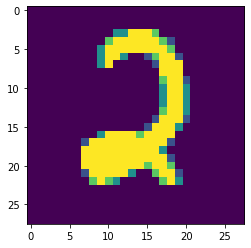

In [35]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [36]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(2)
